In [1]:
# Importing Libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
#Load Data and store it into pandas DataFrame objects
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns=iris.feature_names[:])
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [3]:
Y = pd.DataFrame(iris.target, columns=["Species"])
# Species are setosa,versicolor,virginica
print(Y)

     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


In [4]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [31]:
X_train.shape 

(112, 4)

In [32]:
X_test.shape

(38, 4)

In [33]:
Y_train.shape 

(112, 1)

In [34]:
Y_test.shape 

(38, 1)

In [5]:
# Now let's fit a DecisionTreeClassifier instance
Dtree = DecisionTreeClassifier(max_depth=5)
Dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [6]:
Dtree.score(X_test, Y_test)

0.9736842105263158

In [8]:
# Visualizing the build Decision tree with dot file
from sklearn.tree import export_graphviz

""" gini is a measure that is used to find a node to split on it
    samples refer to the number of samples that are entering this node
    value is a split of the data instances according to their class 
    value = [instances_num_of_setosa, instances_num_of_versicolor, instances_num_of_virginica]
    class is what the decision tree would predict
"""
# Creates dot file named tree.dot
export_graphviz(Dtree, out_file="myTree.dot", feature_names=list(X.columns),
                class_names=iris.target_names,
                filled=True, rounded=True)


In [9]:
# Making a Prediction on a new sample 
sample_data1 = int(Dtree.predict([[5, 5, 1, 3]]))
print(iris.target_names[sample_data1])

versicolor


In [10]:
sample_data1 = int(Dtree.predict([[5, 5, 2.6, 1.5]]))
print(iris.target_names[sample_data1])

versicolor


In [11]:
sample_data1 = int(Dtree.predict([[5, 5, 15, 5]]))
print(iris.target_names[sample_data1])

virginica


In [12]:
sample_data1 = int(Dtree.predict([[1.3, 7, 2.5, 4]]))
print(iris.target_names[sample_data1])

versicolor


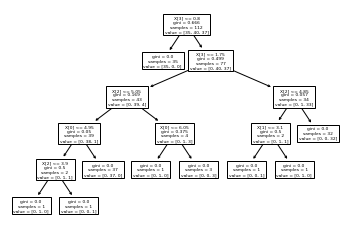

In [13]:
tree.plot_tree(Dtree)
plt.show()